In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
df = pd.read_csv("../data/processed/engineered_salary_data.csv")

# Set visualization style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

df.head()


,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,...,country_India,country_Japan,country_Netherlands,country_Other,country_Spain,country_United Kingdom,country_United States,exp_x_role,exp_x_remote,size_x_gdp
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,...,False,False,False,False,False,False,False,8,0.0,142139.295584
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,...,False,True,False,False,False,False,False,12,0.0,40028.734173
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,...,False,False,False,False,False,True,False,6,1.5,80809.612448
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,...,False,False,False,True,False,False,False,6,0.0,2307.614943
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,...,False,False,False,False,False,False,True,12,1.5,193204.522306


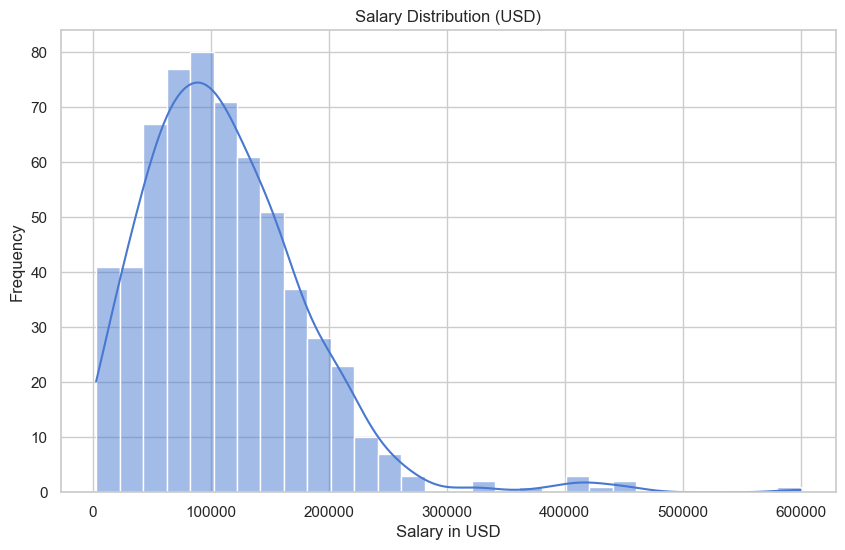

In [10]:
plt.figure()
sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.savefig("../visuals/Salary Distribution (USD)", dpi=300, bbox_inches="tight")
plt.show()


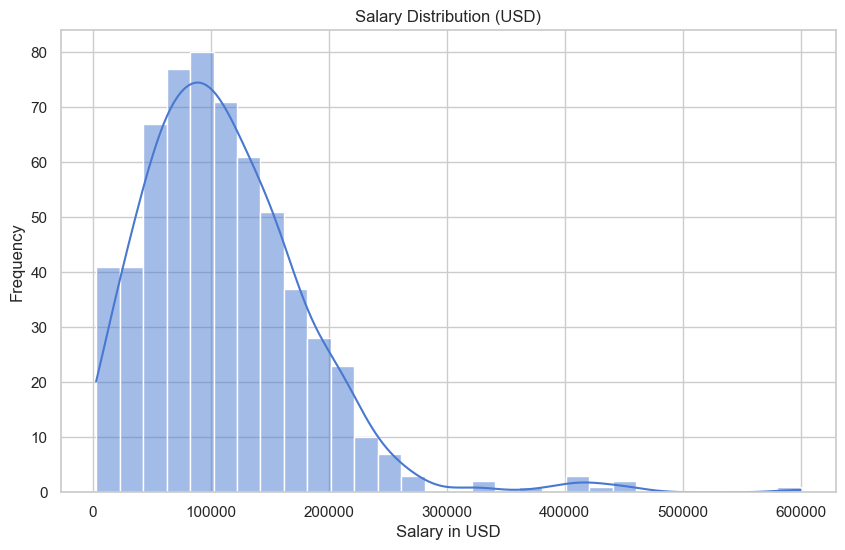

In [11]:
plt.figure()
sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.savefig("../visuals/Salary Distribution (USD)", dpi=300, bbox_inches="tight")
plt.show()


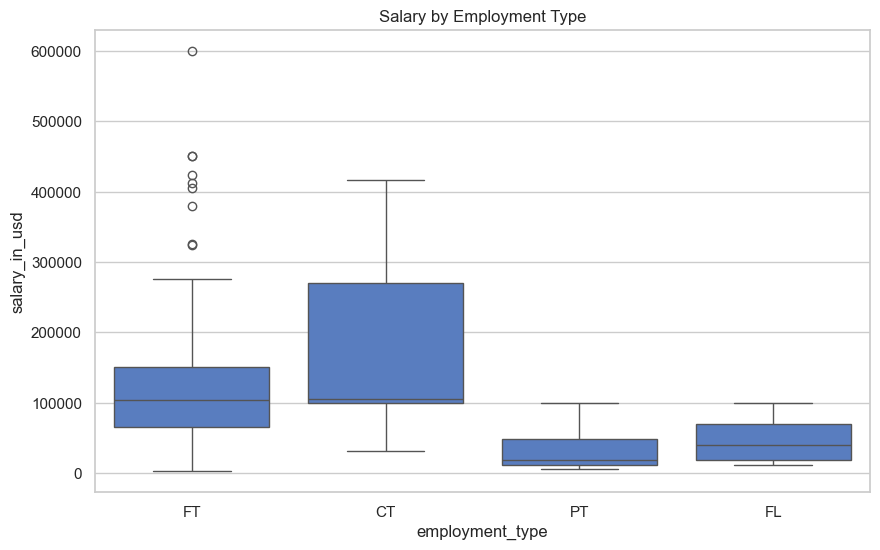

In [12]:
plt.figure()
sns.boxplot(data=df, x="employment_type", y="salary_in_usd")
plt.title("Salary by Employment Type")
plt.savefig("../visuals/Salary by Employment Type", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\Uman\AppData\Local\Temp\ipykernel_8260\727975845.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="remote_type", y="salary_in_usd", estimator="mean", ci=None)


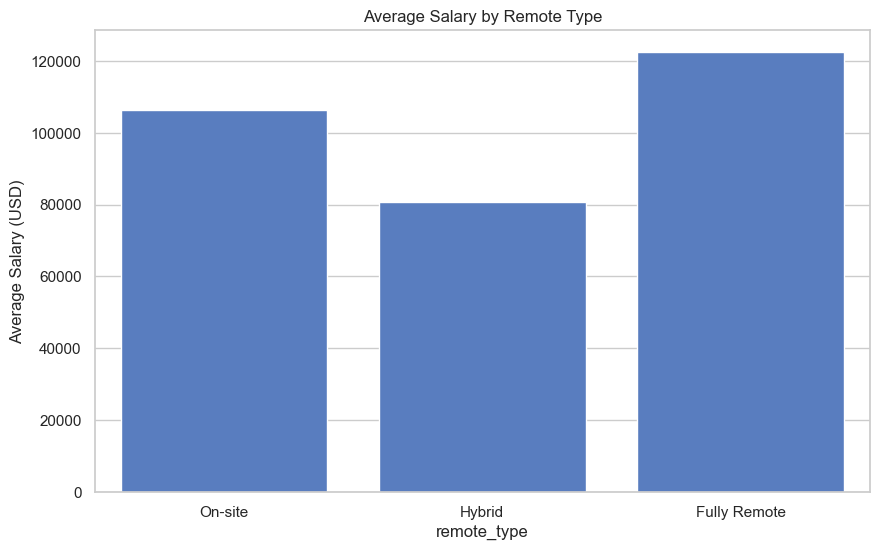

In [13]:
# Create readable remote_type column
def categorize_remote(x):
    if x == 0:
        return "On-site"
    elif x == 50:
        return "Hybrid"
    else:
        return "Fully Remote"

df["remote_type"] = df["remote_ratio"].apply(categorize_remote)

plt.figure()
sns.barplot(data=df, x="remote_type", y="salary_in_usd", estimator="mean", ci=None)
plt.title("Average Salary by Remote Type")
plt.ylabel("Average Salary (USD)")
plt.savefig("../visuals/Average Salary by Remote Type", dpi=300, bbox_inches="tight")
plt.show()


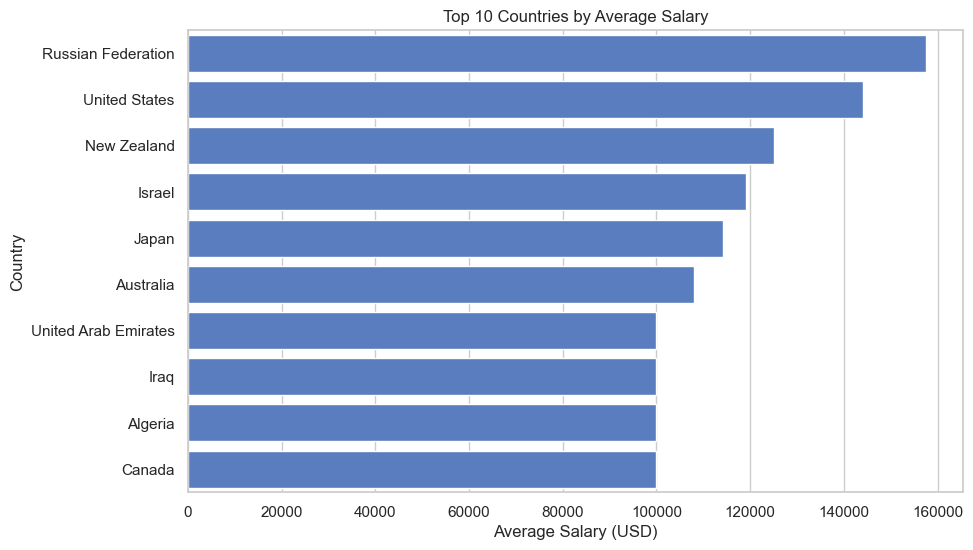

In [14]:
top_countries = df.groupby("Country")["salary_in_usd"].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country")
plt.savefig("../visuals/Average Salary (USD)", dpi=300, bbox_inches="tight")
plt.show()


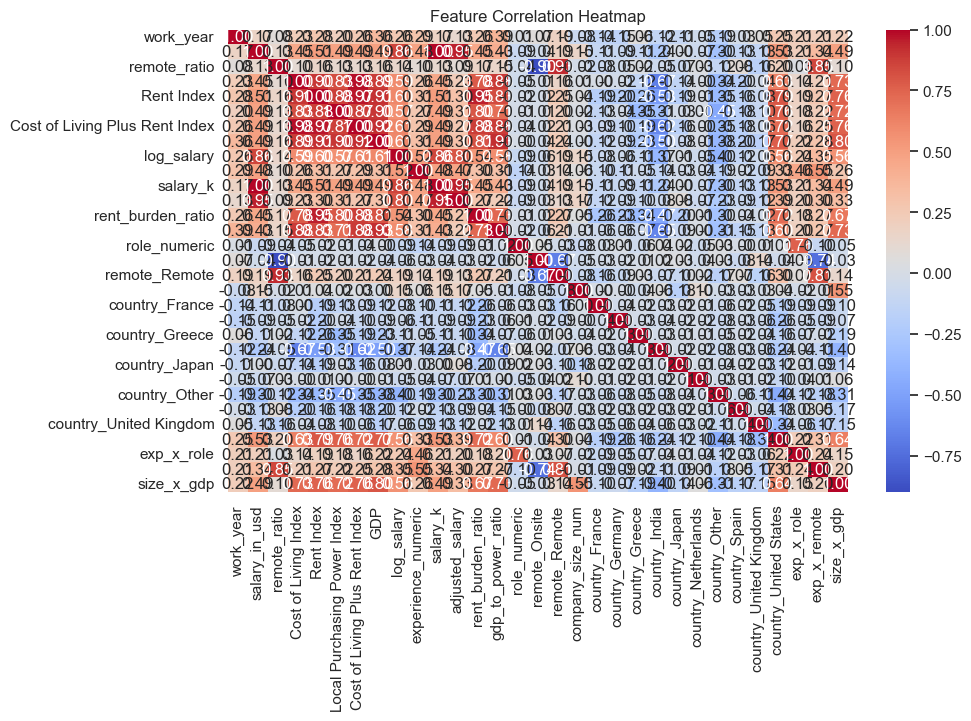

In [15]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("../visuals/Feature Correlation Heatmap", dpi=300, bbox_inches="tight")
plt.show()


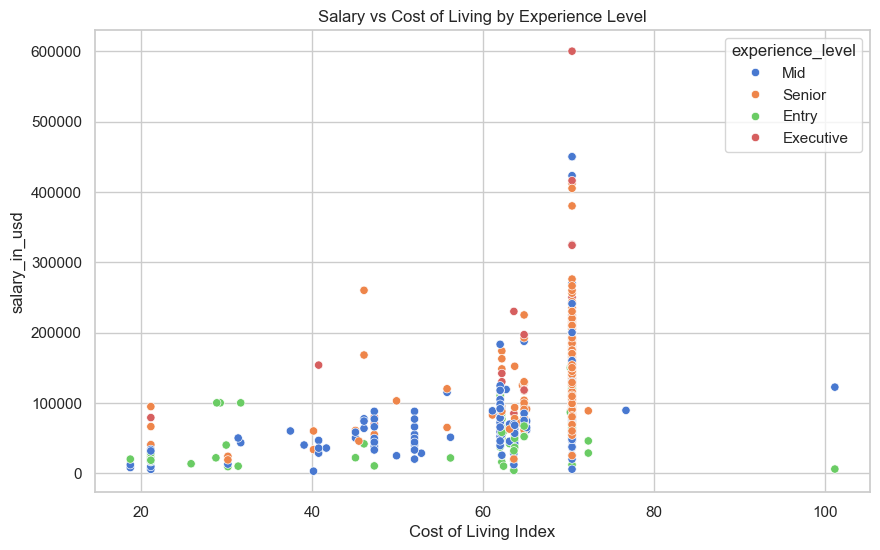

In [16]:
plt.figure()
sns.scatterplot(data=df, x="Cost of Living Index", y="salary_in_usd", hue="experience_level")
plt.title("Salary vs Cost of Living by Experience Level")
plt.savefig("../visuals/Salary vs Cost of Living by Experience Level", dpi=300, bbox_inches="tight")

plt.show()
